In [93]:
import numpy as np
import pandas as pd

health = pd.read_csv("../Datasets/rankmd.csv", delimiter=";")
FastFood = pd.read_csv("../Datasets/FastFoodRestaurants.csv")
income = pd.read_csv("../Datasets/kaggle_income.csv", encoding="ISO 8859-1")
FastFood['State'] = FastFood['province'].map(abbrev_to_us_state)

In [2]:
health

,FIPS,State,County,Unreliable,premature_deathDeaths,premature_deathYears_of_Potential_Life_Lost_Rate,premature_death_95% CILow,premature_death_95% CI - High,premature_death_Quartile,premature_death_YPLL Rate (AIAN),...,drive_alone_to_work_% Drive Alone (Hispanic) 95% CI - High,drive_alone_to_work_% Drive Alone (White),drive_alone_to_work_% Drive Alone (White) 95% CI - Low,drive_alone_to_work_% Drive Alone (White) 95% CI - High,long_commute_driving_alone_# Workers who Drive Alone,long_commute_driving_alone_% Long Commute - Drives Alone,long_commute_driving_alone_95% CI - Low,long_commute_driving_alone_95% CI - High,long_commute_driving_alone_Quartile,Unnamed: 249
0,1000,Alabama,NaN,NaN,82249.0,9820.0,9718.0,9922.0,NaN,5145.0,...,78.0,87.0,87.0,87.0,2073072,35,34,35,NaN,NaN
1,1001,Alabama,Autauga,NaN,787.0,7830.0,6998.0,8662.0,1.0,NaN,...,NaN,82.0,78.0,87.0,24635,38,34,42,2.0,NaN
2,1003,Alabama,Baldwin,NaN,3147.0,7680.0,7237.0,8124.0,1.0,NaN,...,83.0,82.0,80.0,84.0,93141,40,38,43,3.0,NaN
3,1005,Alabama,Barbour,NaN,515.0,11477.0,9908.0,13045.0,3.0,NaN,...,NaN,86.0,82.0,91.0,8231,31,26,36,2.0,NaN
4,1007,Alabama,Bibb,NaN,476.0,12173.0,10506.0,13839.0,4.0,NaN,...,NaN,NaN,NaN,NaN,8167,52,44,60,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Wyoming,Sweetwater,NaN,527.0,7775.0,6849.0,8701.0,3.0,NaN,...,67.0,77.0,75.0,79.0,21188,17,14,19,2.0,NaN
3189,56039,Wyoming,Teton,NaN,109.0,2980.0,2094.0,3866.0,1.0,NaN,...,76.0,67.0,63.0,71.0,14096,16,11,21,2.0,NaN
3190,56041,Wyoming,Uinta,NaN,271.0,8081.0,6637.0,9525.0,4.0,NaN,...,NaN,NaN,NaN,NaN,9155,20,15,24,3.0,NaN
3191,56043,Wyoming,Washakie,NaN,104.0,6541.0,4417.0,8665.0,2.0,NaN,...,NaN,NaN,NaN,NaN,3663,7,4,10,1.0,NaN


In [61]:
#health['ColumnID'] = total_rows['ColumnID']
States = health[health['FIPS'].astype(str).str.endswith('000')]
print("Top 5 states with the most Premature Deaths:")
States.sort_values("premature_deathDeaths",ascending=False).head()


Top 5 states with the most Premature Deaths:


,FIPS,State,County,Unreliable,premature_deathDeaths,premature_deathYears_of_Potential_Life_Lost_Rate,premature_death_95% CILow,premature_death_95% CI - High,premature_death_Quartile,premature_death_YPLL Rate (AIAN),...,drive_alone_to_work_% Drive Alone (Hispanic) 95% CI - High,drive_alone_to_work_% Drive Alone (White),drive_alone_to_work_% Drive Alone (White) 95% CI - Low,drive_alone_to_work_% Drive Alone (White) 95% CI - High,long_commute_driving_alone_# Workers who Drive Alone,long_commute_driving_alone_% Long Commute - Drives Alone,long_commute_driving_alone_95% CI - Low,long_commute_driving_alone_95% CI - High,long_commute_driving_alone_Quartile,Unnamed: 249
190,6000,California,NaN,NaN,350612.0,5253.0,5228.0,5278.0,NaN,9636.0,...,74.0,75.0,75.0,75.0,18191555,42,42,42,NaN,NaN
2566,48000,Texas,NaN,NaN,302432.0,6620.0,6587.0,6653.0,NaN,3497.0,...,79.0,82.0,82.0,82.0,13115511,39,39,39,NaN,NaN
329,12000,Florida,NaN,NaN,266657.0,7188.0,7145.0,7231.0,NaN,5380.0,...,77.0,81.0,81.0,81.0,9383111,42,42,43,NaN,NaN
1860,36000,New York,NaN,NaN,191195.0,5406.0,5370.0,5443.0,NaN,4789.0,...,35.0,63.0,63.0,63.0,9300315,39,38,39,NaN,NaN
2078,39000,Ohio,NaN,NaN,169097.0,8545.0,8484.0,8607.0,NaN,4405.0,...,76.0,85.0,85.0,85.0,5488776,31,31,31,NaN,NaN


[Text(0.5, 1.0, 'Percentage of Obese people per state')]

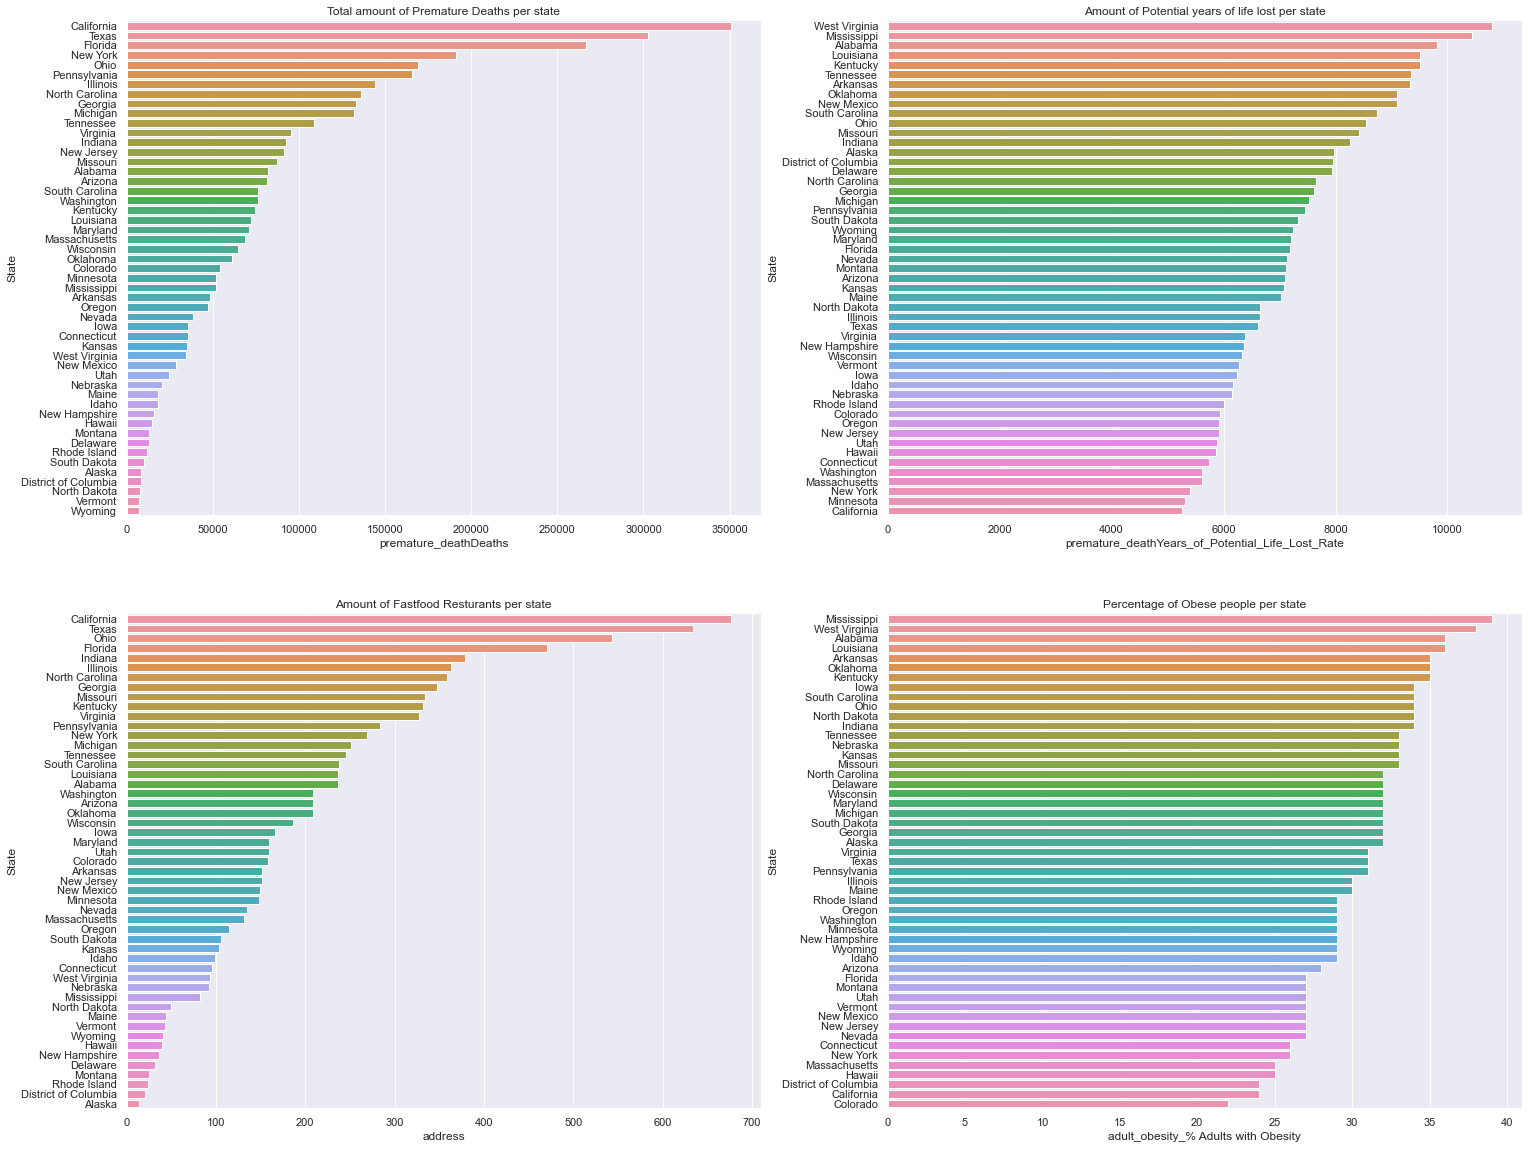

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, sharex=False, figsize=(25,20))

sns.set(rc={'figure.figsize':(12,9)})
sns.despine(left=True, bottom=True)
sns.barplot(ax=axes[0,0], data=States.sort_values("premature_deathDeaths",ascending=False), y='State', x='premature_deathDeaths').set(title='Total amount of Premature Deaths per state')
sns.barplot(ax=axes[0,1], data=States.sort_values("premature_deathYears_of_Potential_Life_Lost_Rate",ascending=False), y='State', x='premature_deathYears_of_Potential_Life_Lost_Rate').set(title='Amount of Potential years of life lost per state')
sns.barplot(ax=axes[1,0], data=FastFood.groupby(['State']).count().reset_index().sort_values("address",ascending=False), y='State', x='address').set(title='Amount of Fastfood Resturants per state')
sns.barplot(ax=axes[1,1], data=States.sort_values('adult_obesity_% Adults with Obesity',ascending=False), y='State', x='adult_obesity_% Adults with Obesity').set(title='Percentage of Obese people per state')

[Text(0.5, 1.0, 'Amount of Fastfood Resturants per state')]

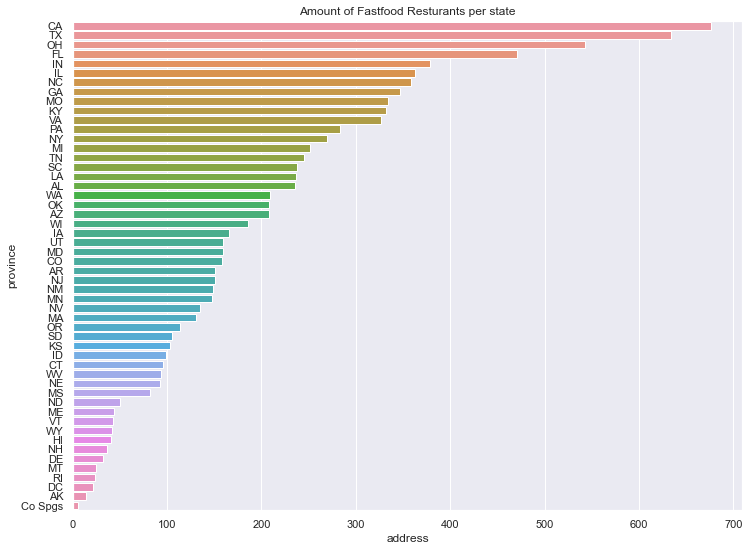

In [85]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))



sns.set(rc={'figure.figsize':(12,9)})
sns.despine(left=True, bottom=True)
sns.barplot(data=FastFood.groupby(['province']).count().reset_index().sort_values("address",ascending=False), y='province', x='address').set(title='Amount of Fastfood Resturants per state')

In [92]:
FastFood['State'] = FastFood['province'].map(abbrev_to_us_state)
FastFood

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites,State
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.921300,-74.890210,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/...",New York
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.532550,-83.445260,Wendy's,43160,OH,http://www.wendys.com,Ohio
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.627360,-83.791410,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com...",Kentucky
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.950080,-74.845530,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/...",New York
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.351550,-82.097280,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse...",Ohio
...,...,...,...,...,...,...,...,...,...,...,...
9995,3013 Peach Orchard Rd,Augusta,US,us/ga/augusta/3013peachorchardrd/-791445730,33.415257,-82.024531,Wendy's,30906,GA,"http://www.wendys.com,http://wendys.com",Georgia
9996,678 Northwest Hwy,Cary,US,us/il/cary/678northwesthwy/787691191,42.217300,-88.255800,Lee's Oriental Martial Arts,60013,IL,http://www.mcdonalds.com,Illinois
9997,1708 Main St,Longmont,US,us/co/longmont/1708mainst/-448666054,40.189190,-105.101720,Five Guys,80501,CO,http://fiveguys.com,Colorado
9998,67740 Highway 111,Cathedral City,US,us/ca/cathedralcity/67740highway111/-981164808,33.788640,-116.482150,El Pollo Loco,92234,CA,"http://www.elpolloloco.com,http://elpolloloco.com",California


[Text(0.5, 1.0, 'Percentage of Obese people per state')]

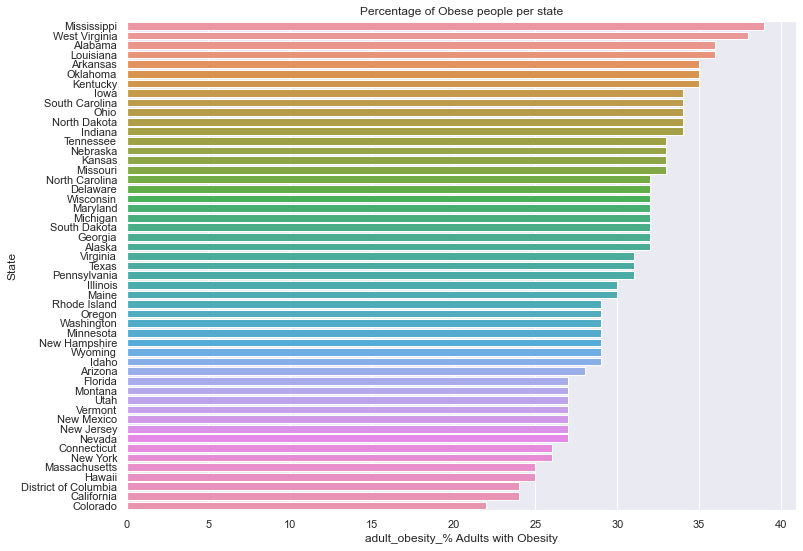

In [72]:
sns.barplot(data=States.sort_values('adult_obesity_% Adults with Obesity',ascending=False), y='State', x='adult_obesity_% Adults with Obesity').set(title='Percentage of Obese people per state')

In [83]:
FastFood

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.921300,-74.890210,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.532550,-83.445260,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.627360,-83.791410,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.950080,-74.845530,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.351550,-82.097280,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."
...,...,...,...,...,...,...,...,...,...,...
9995,3013 Peach Orchard Rd,Augusta,US,us/ga/augusta/3013peachorchardrd/-791445730,33.415257,-82.024531,Wendy's,30906,GA,"http://www.wendys.com,http://wendys.com"
9996,678 Northwest Hwy,Cary,US,us/il/cary/678northwesthwy/787691191,42.217300,-88.255800,Lee's Oriental Martial Arts,60013,IL,http://www.mcdonalds.com
9997,1708 Main St,Longmont,US,us/co/longmont/1708mainst/-448666054,40.189190,-105.101720,Five Guys,80501,CO,http://fiveguys.com
9998,67740 Highway 111,Cathedral City,US,us/ca/cathedralcity/67740highway111/-981164808,33.788640,-116.482150,El Pollo Loco,92234,CA,"http://www.elpolloloco.com,http://elpolloloco.com"
